In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, poisson

In [3]:
def enlaces_aleatorios(N, p):
  for i in range(N):
    for j in range(i):
      if np.random.rand() < p:
        yield i,j

def red_aleatoria(N, p):
  G = nx.Graph()
  G.add_nodes_from(range(N)) # agrega todos los nodos
  
  G.add_edges_from( enlaces_aleatorios(N, p) ) # agrega los enlaces obedeciendo la probabilidad p
  
  return G

Recordar que bins divide nuestro histograma en la cantidad de datos que queramos en partes iguales.

In [30]:
N = 100
p = 0.5
corridas = 500
Y = np.zeros(N)
for i in range(corridas):
  G = red_aleatoria(N,p)
  grados = np.array([G.degree[nodo] for nodo in G])
  # El parámetro de de density nos permite que los datos estén acotados entre 0 y 1
  y,x = np.histogram(grados, bins = range(N+1), density = True)
  Y += y/corridas

In [ ]:
# np.histogram(grados, bins = range(M+2))

(array([ 0,  0,  1,  0,  1,  2,  5,  6,  8, 18,  7, 14, 12,  7,  5,  4,  4,
         4,  1,  1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]))

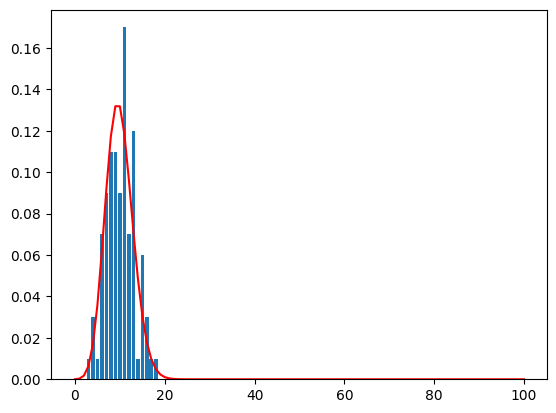

In [18]:
plt.bar(x[:-1],y)
plt.plot(x,binom.pmf(x,N-1,p),"r-")
plt.show()

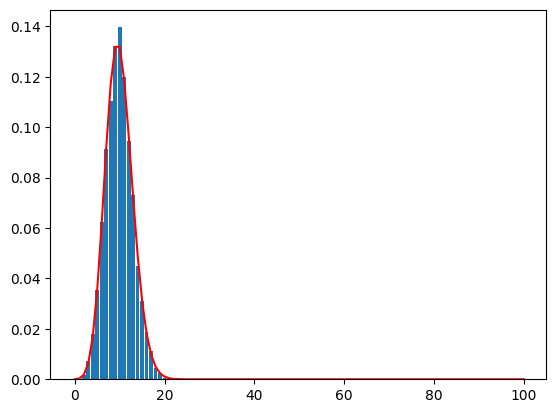

In [21]:
plt.bar(x[:-1],Y)
plt.plot(x,binom.pmf(x,N-1,p),"r-")
plt.show()

Podemos notar que el número de corridas, mientras sean más, el histograma se podrá adaptar mejor a la curva generada por la distribución.

In [35]:
m = 0
for i,n in enumerate(Y/Y.sum()):
  m += i*n

<function matplotlib.pyplot.show(close=None, block=None)>

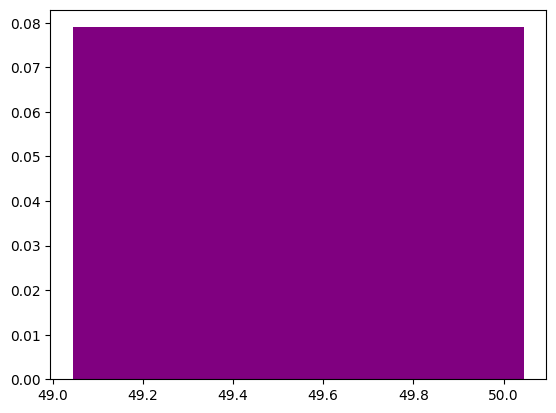

In [41]:
plt.bar([m],[max(Y)],width = 1,color = "purple")
plt.show

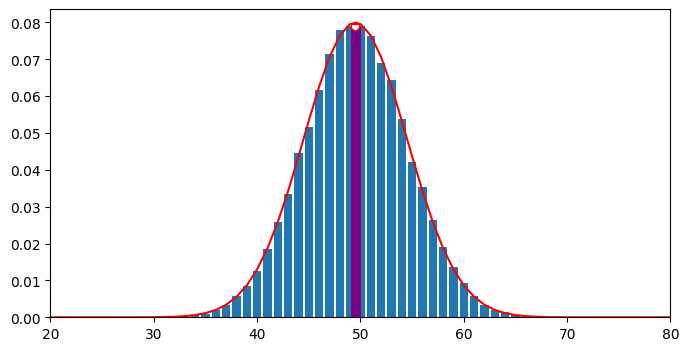

In [39]:
plt.figure(figsize = [8,4])
plt.bar(x[:-1],Y)
plt.plot(x,binom.pmf(x,N-1,p),"r-")
plt.bar([m],[max(Y)],width = 1,color = "purple")
plt.scatter(p*(N-1),max(Y),facecolor = "white",edgecolor = "red")
plt.xlim([20,80])
plt.show()